/tmp/ipython-input-1390367671.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df.loc[mask, 'X_meters'], df.loc[mask, 'Y_meters'],


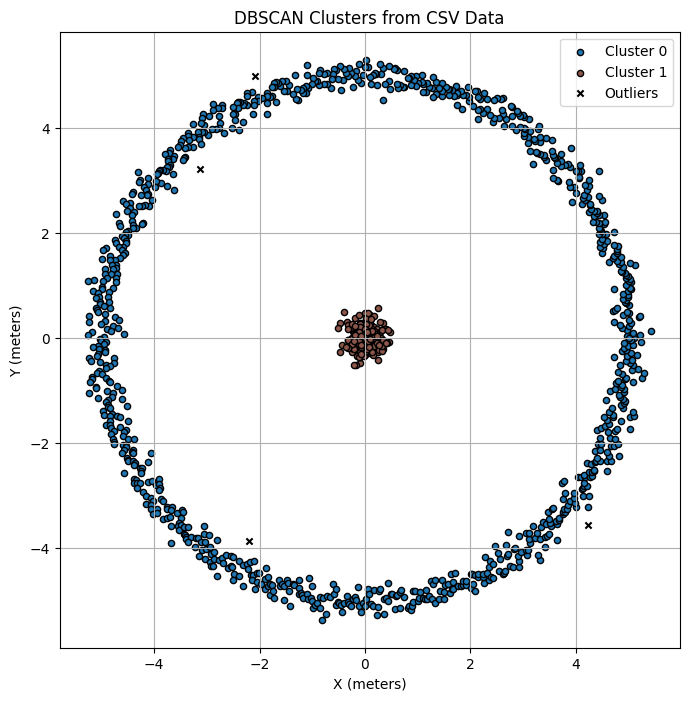

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file (adjust filename/path if needed)
df = pd.read_csv("/content/Synthetic WiFi Signal Measurements - Auxin Security.csv")

# Extract coordinates
X = df[['X_meters', 'Y_meters']].values

# Run DBSCAN with the same parameters as before
db = DBSCAN(eps=0.3, min_samples=8)
labels = db.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 8))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Outliers in black
        marker = 'x'
        label_text = 'Outliers'
    else:
        marker = 'o'
        label_text = f'Cluster {label}'

    mask = (labels == label)
    plt.scatter(df.loc[mask, 'X_meters'], df.loc[mask, 'Y_meters'],
                c=[color], marker=marker, edgecolors='k', label=label_text, s=20)

plt.title("DBSCAN Clusters from CSV Data")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
